## Import Libraries

In [24]:
import time
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## Import Data

In [2]:
def load_dataset():
    
    training_data = h5py.File('C:/Users/Akhil/Deep Learning Everyday/Logistic Regression with Neural Network Mindset/dataset/train_catvnoncat.h5',"r")
    x_train_orig = np.array(training_data["train_set_x"][:])
    y_train_orig = np.array(training_data["train_set_y"][:])
    
    classes = np.array(training_data["list_classes"][:])
    
    test_data = h5py.File('C:/Users/Akhil/Deep Learning Everyday/Logistic Regression with Neural Network Mindset/dataset/test_catvnoncat.h5',"r")
    x_test_orig = np.array(test_data["test_set_x"][:])
    y_test_orig = np.array(test_data["test_set_y"][:])
    
    y_train_orig = y_train_orig.reshape(1,y_train_orig.shape[0])
    y_test_orig = y_test_orig.reshape(1, y_test_orig.shape[0])
    
    return x_train_orig, y_train_orig, x_test_orig, y_test_orig, classes

## Load Data

In [3]:
x_train_orig, y_train_orig, x_test_orig, y_test_orig, classes = load_dataset()

## Visualize the Data

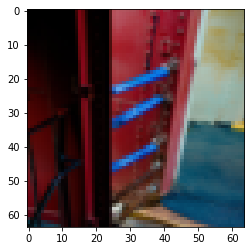

y = [0] This means it is a non-cat image


In [4]:
index = 45
plt.imshow(x_train_orig[index])
plt.show()
print("y = " + str(y_train_orig[:, index])+ " This means it is a " + classes[np.squeeze(y_train_orig[:,index])].decode("utf-8")+ " image" )

## Shape of the Data

In [5]:
train_ex = y_train_orig.shape[1]
test_ex = y_test_orig.shape[1]

print("The number of training examples are " + str(train_ex))
print("the number of testing examples are " + str(test_ex))

print("the size of the training input is " + str(x_train_orig.shape))
print("The size of the training ouput is " + str(y_train_orig.shape))
print("The size of the test input is " + str(x_test_orig.shape))
print("the size of the test output is " + str(y_test_orig.shape))

The number of training examples are 209
the number of testing examples are 50
the size of the training input is (209, 64, 64, 3)
The size of the training ouput is (1, 209)
The size of the test input is (50, 64, 64, 3)
the size of the test output is (1, 50)


## Reshaping and Normalization

In [7]:
x_train_flat = x_train_orig.reshape(x_train_orig.shape[0],-1).T
x_test_flat = x_test_orig.reshape(x_test_orig.shape[0],-1).T

x_train = x_train_flat/255
x_test = x_test_flat/255

y_train  = y_train_orig
y_test = y_test_orig

print("the size of the training input is " + str(x_train.shape))
print("The size of the training ouput is " + str(y_train.shape))
print("The size of the test input is " + str(x_test.shape))
print("the size of the test output is " + str(y_test.shape))

the size of the training input is (12288, 209)
The size of the training ouput is (1, 209)
The size of the test input is (12288, 50)
the size of the test output is (1, 50)


# N Layer Neural Network

## Initialize Parameters

In [26]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

## Sigmoid Function

In [27]:
def sigmoid(Z):
    
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

## ReLU Function

In [28]:
def relu(Z):
    
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

## Linear Forward

In [29]:
def linear_forward(A, W, b):
   
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache 

## Linear Activation Forward

In [30]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

## Linear Model Forward

In [31]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

## Compute Cost

In [35]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

## Sigmoid backward

In [36]:
def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

## ReLU Backward

In [37]:
def relu_backward(dA, cache):
   
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

## Linear Backward

In [38]:
def linear_backward(dZ, cache):
   
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

## Linear Activation Backward

In [39]:
def linear_activation_backward(dA, cache, activation):
   
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

## Linear Model Backward

In [40]:
def L_model_backward(AL, Y, caches):
   
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


## Update Parameters

In [41]:
def update_parameters(parameters, grads, learning_rate):
   
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

## Predict Parameters

In [42]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

## NN Deep Model

#### Here We have defined a 5 layered Neural Network Model

In [43]:
layers_dims = [12288, 20, 7, 5, 1]

In [62]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if  i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    
    return parameters

## Plot

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878

the time required is 62.280219316482544


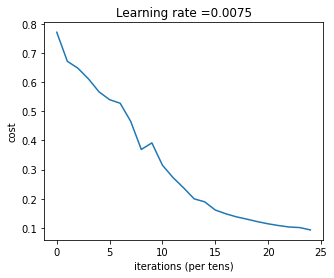


-------------------------------------------------------

the Accuracy on the training set is
Accuracy: 0.9856459330143539

the Accuracy on the test set is
Accuracy: 0.8


In [60]:
parameters = L_layer_model(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

print ('\n' + "-------------------------------------------------------" + '\n')  


print("the Accuracy on the training set is")
train_accuracy = predict(x_train, y_train, parameters)
print()
print("the Accuracy on the test set is")
test_accuracy = predict(x_test, y_test, parameters)

## Multiple Plots

The Learning rate is : 0.01

the time required is 61.461509227752686


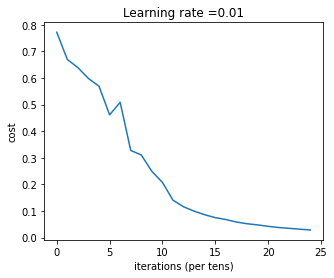

the Accuracy on the training set is
Accuracy: 0.9999999999999998

the Accuracy on the test set is
Accuracy: 0.8400000000000001

-------------------------------------------------------

The Learning rate is : 0.001

the time required is 61.369767904281616


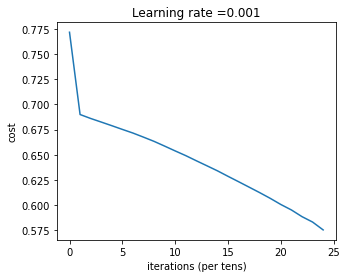

the Accuracy on the training set is
Accuracy: 0.8564593301435406

the Accuracy on the test set is
Accuracy: 0.7

-------------------------------------------------------

The Learning rate is : 0.0001

the time required is 61.645559549331665


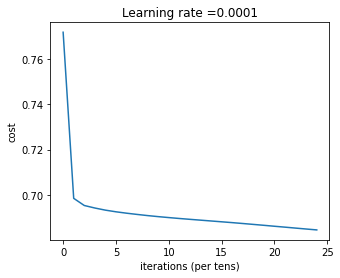

the Accuracy on the training set is
Accuracy: 0.708133971291866

the Accuracy on the test set is
Accuracy: 0.36000000000000004

-------------------------------------------------------



In [63]:
learning_rates = [0.01, 0.001, 0.0001]
for i in learning_rates:
    print("The Learning rate is " + ": " + str(i))
    
    parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate = i,  num_iterations=2500, print_cost=False)
    
    print("the Accuracy on the training set is")
    train_accuracy = predict(x_train, y_train, parameters)
    print()
    print("the Accuracy on the test set is")
    test_accuracy = predict(x_test, y_test, parameters)
    print ('\n' + "-------------------------------------------------------" + '\n')    
    